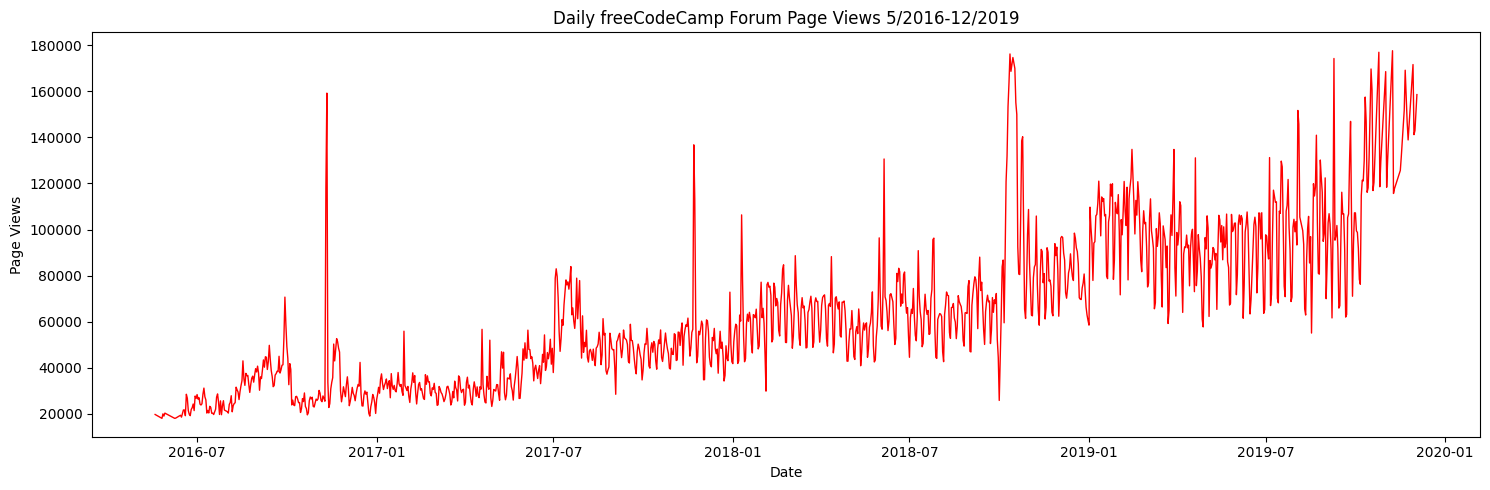

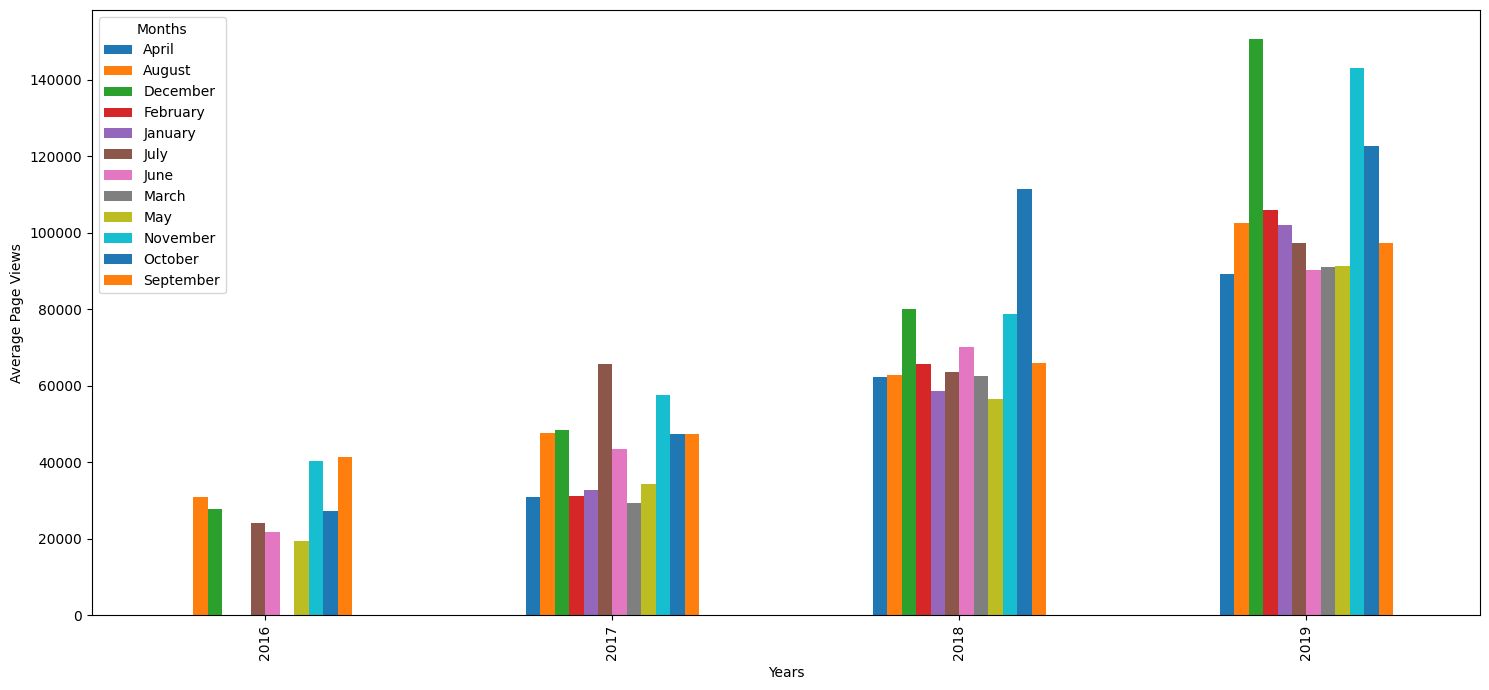

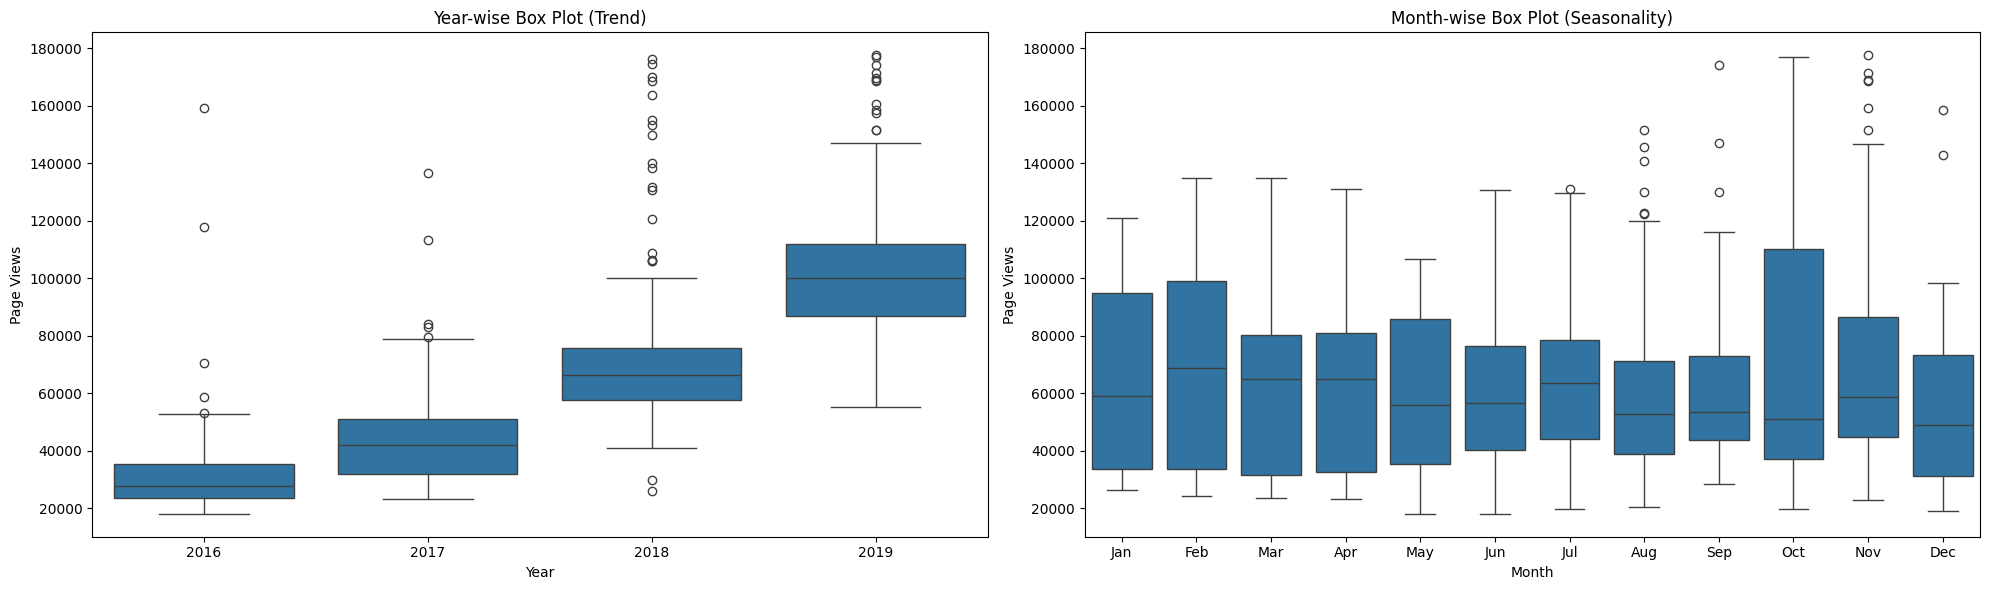

In [1]:
#  Time Series Visualizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(
    'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv',
    parse_dates=['date'],
    index_col='date'
)

# Clean data by removing top and bottom 2.5% of page views
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

#  1. Line Plot
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    plt.tight_layout()
    return fig

#  2. Bar Plot
def draw_bar_plot():
    # Copy and prepare data
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%B')
    df_bar['month_num'] = df_bar.index.month
    df_bar = df_bar.sort_values('month_num')

    # Pivot table for monthly average per year
    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Plot
    fig = df_grouped.plot(kind='bar', figsize=(15, 7)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title='Months')
    plt.tight_layout()
    return fig

#  3. Box Plot
def draw_box_plot():
    # Prepare data
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month

    # Sort by month number for correct ordering
    df_box = df_box.sort_values('month_num')

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    # Year-wise
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()
    return fig

#  Run and display all plots
fig1 = draw_line_plot()
fig1.show()

fig2 = draw_bar_plot()
fig2.show()

fig3 = draw_box_plot()
fig3.show()


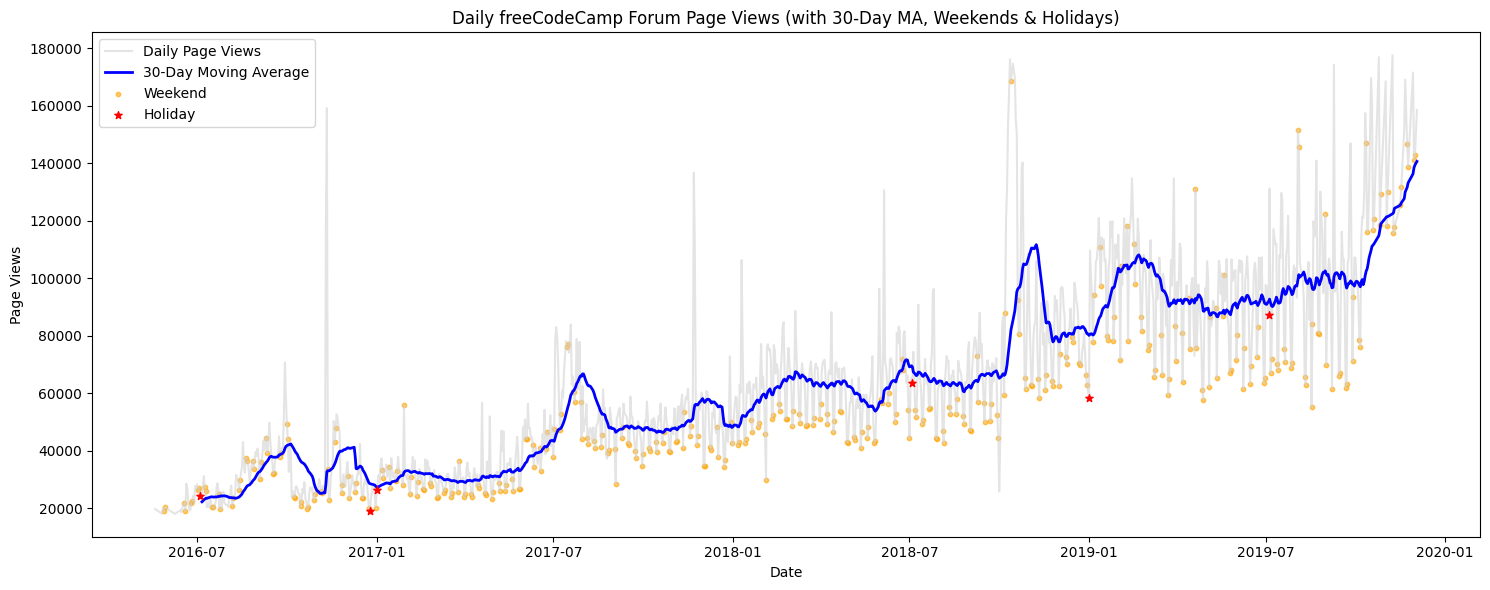

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and clean the data
df = pd.read_csv(
    'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv',
    parse_dates=['date'],
    index_col='date'
)
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

# Add rolling 30-day average
df['30_day_avg'] = df['value'].rolling(window=30).mean()

# Mark weekends
df['is_weekend'] = df.index.weekday >= 5  # Saturday/Sunday = 5 or 6

# You can optionally load holiday dates
us_holidays = pd.to_datetime([
    "2016-07-04", "2016-12-25", "2017-01-01", "2018-07-04", "2019-01-01",
    "2019-07-04", "2019-12-25"  # Add more if needed
])
df['is_holiday'] = df.index.isin(us_holidays)

# 📈 Enhanced Line Plot
def draw_enhanced_line_plot():
    fig, ax = plt.subplots(figsize=(15, 6))

    # Original page views
    ax.plot(df.index, df['value'], color='lightgray', label='Daily Page Views', alpha=0.6)

    # 30-day moving average
    ax.plot(df.index, df['30_day_avg'], color='blue', linewidth=2, label='30-Day Moving Average')

    # Highlight weekends
    ax.scatter(df[df['is_weekend']].index, df[df['is_weekend']]['value'],
               color='orange', label='Weekend', alpha=0.6, s=10)

    # Highlight holidays
    ax.scatter(df[df['is_holiday']].index, df[df['is_holiday']]['value'],
               color='red', label='Holiday', s=30, marker='*', zorder=5)

    ax.set_title("Daily freeCodeCamp Forum Page Views (with 30-Day MA, Weekends & Holidays)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.legend()
    plt.tight_layout()
    return fig

# Plot the enhanced chart
fig = draw_enhanced_line_plot()
fig.show()


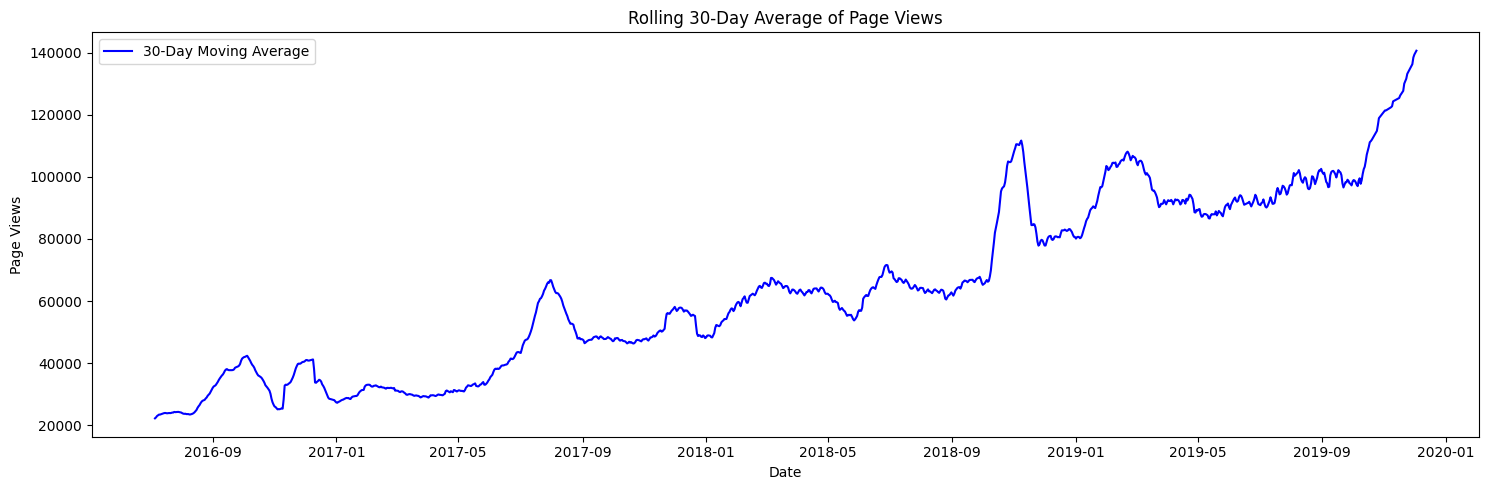

In [3]:
def draw_rolling_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['30_day_avg'], color='blue', label='30-Day Moving Average')
    ax.set_title('Rolling 30-Day Average of Page Views')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.legend()
    plt.tight_layout()
    return fig

# Display rolling plot
fig_rolling = draw_rolling_plot()
fig_rolling.show()